<a href="https://colab.research.google.com/github/AndrewstheBuilder/DeepLearning/blob/main/Titanic_Project/Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


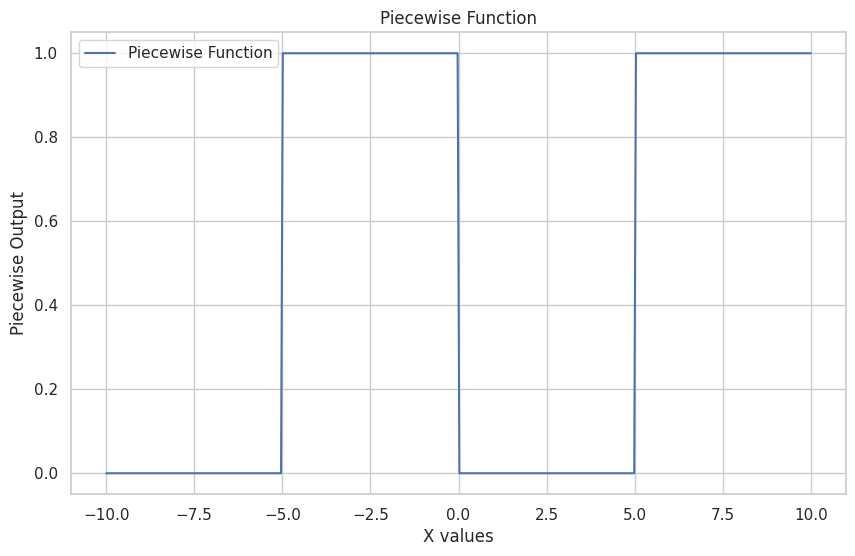

Correlation coefficient: 0.43301405506325596


In [2]:
# Prove to myself that outputs going up and down will give a bad correlation
# Correlation only captures monotonic relationships
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def piecewise(x):
    if x < -5:
        return 0
    elif -5 <= x < 0:
        return 1
    elif 0 <= x < 5:
        return 0
    else:
        return 1

# Generate x values
x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10

# Apply the piecewise function to each x value
y = np.array([piecewise(xi) for xi in x])

# Plotting the Sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Piecewise Function')
plt.title('Piecewise Function')
plt.xlabel('X values')
plt.ylabel('Piecewise Output')
plt.grid(True)
plt.legend()
plt.show()

# Create a DataFrame
data = pd.DataFrame({'X': x, 'Y': y})

# Calculate correlation
correlation = data['X'].corr(data['Y'])
print("Correlation coefficient:", correlation)

In [3]:
import pandas as pd

In [6]:
data = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
numeric_df = data.select_dtypes(include=[float, int])
numeric_df['Sex'] = data['Sex'].map({'male': 0, 'female':1})
numeric_df['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})

# numeric_df.head()
numeric_df.corr()

In [ ]:
# data[['Age','Survived']].plot()
# data['Age'].hist(by=data['Survived'], bins=20, alpha=0.7, figsize=(10, 5))
# plt.show()

In [ ]:
# Determine Age bands and check correlation with Survived
# print(pd.cut(data['Age'],5))
# print(data['Age'].head())
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Completely useless plot
# But it shows why the correlation calculation would not work.
# The data is up and down
plt.figure(figsize=(50,6))
plt.scatter(data['Age'], data['Survived'], alpha=1, color='red')
plt.title("Scatter Plot of Survived vs. Age")
plt.xlabel('Age')
plt.ylabel('Survived')
plt.xticks(range(1, 101, 1))
plt.grid(True)
plt.show()

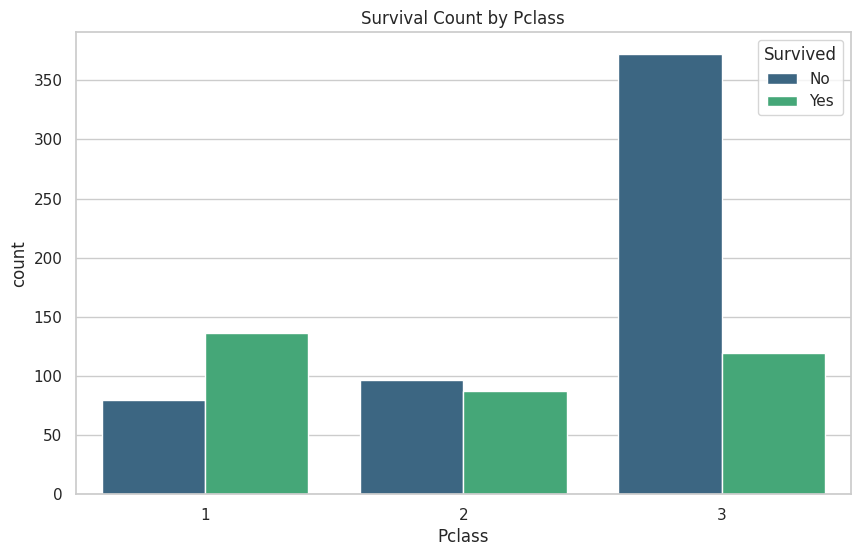

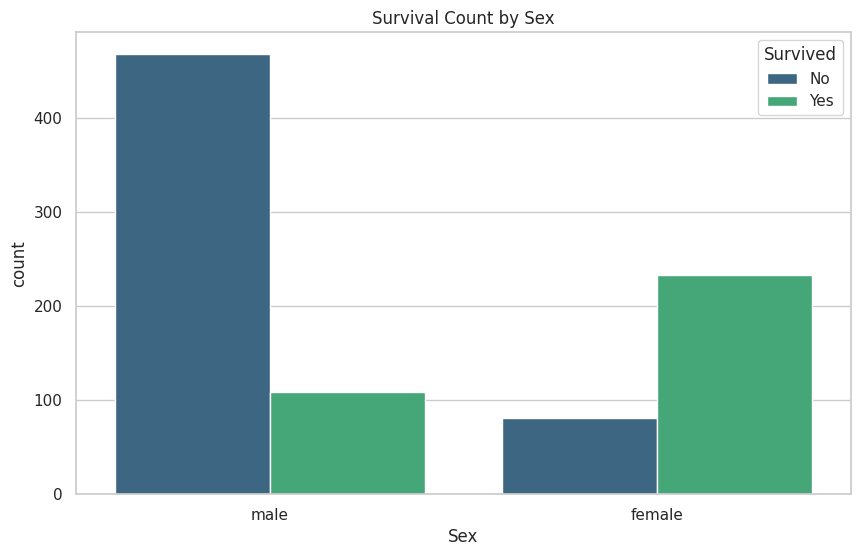

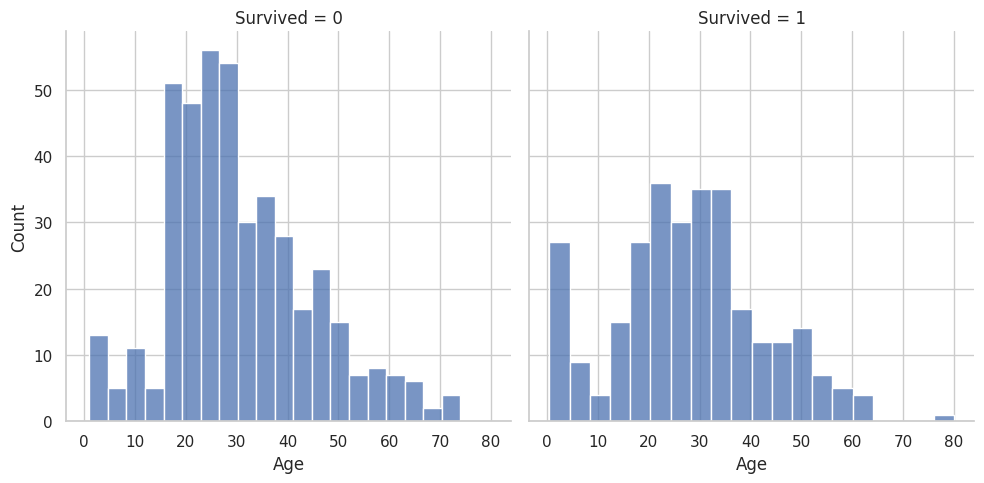

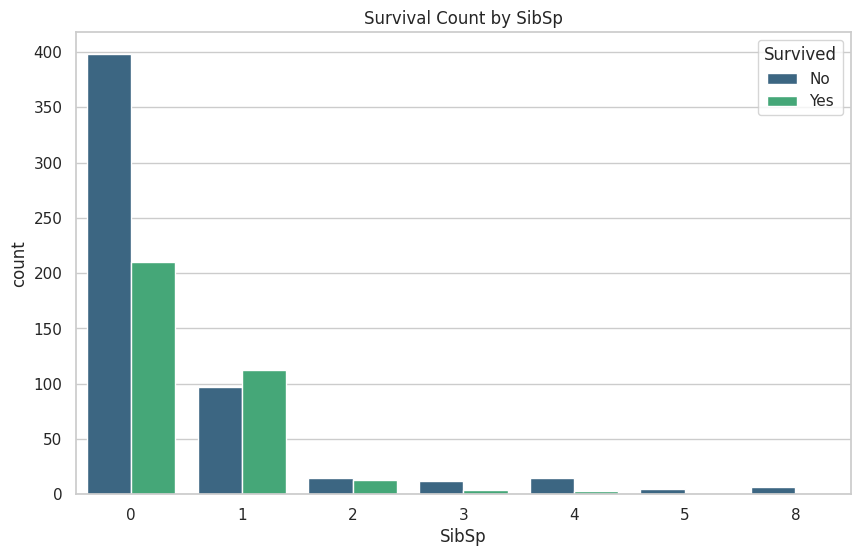

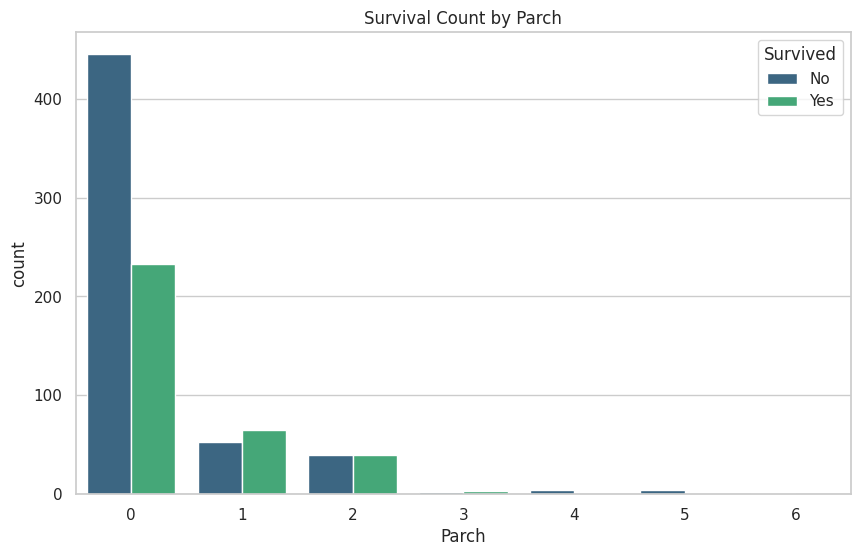

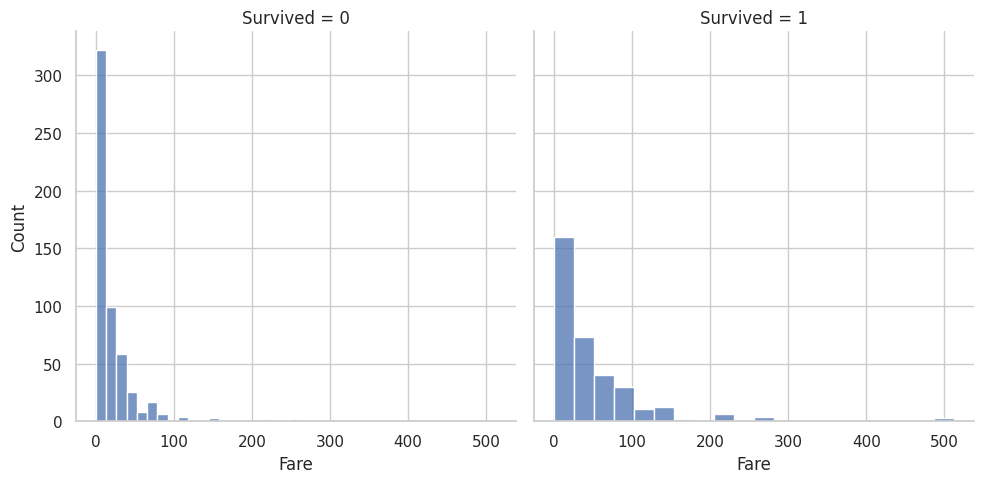

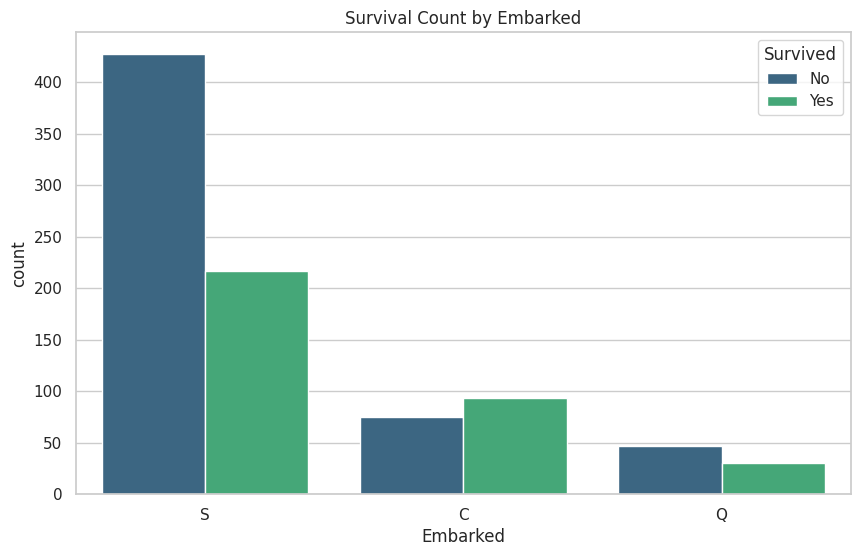

In [12]:
# These graphs are gold!
# Load and analyze the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Define a function to plot survival count based on a given feature
def plot_survival(data, column):
    if column=='Age' or column=='Fare':
        # Create a facet grid of Histograms for numeric data
#         print('column',column)
#         print('column != Age', column!='Age')
#         print('data[column].dtype',data[column].dtype)
        g = sns.FacetGrid(data, col='Survived', height=5, aspect=1)
        g.map(sns.histplot, column, bins=20, kde=False)
    else:
        # Create a count plot for categorical data
#         print('column 2',column)
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Survived', data=data, palette='viridis')
        plt.title(f'Survival Count by {column}')
        plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
        plt.show()

# Create a loop to generate plots for each relevant column
for column in columns_to_plot:
    plot_survival(data, column)

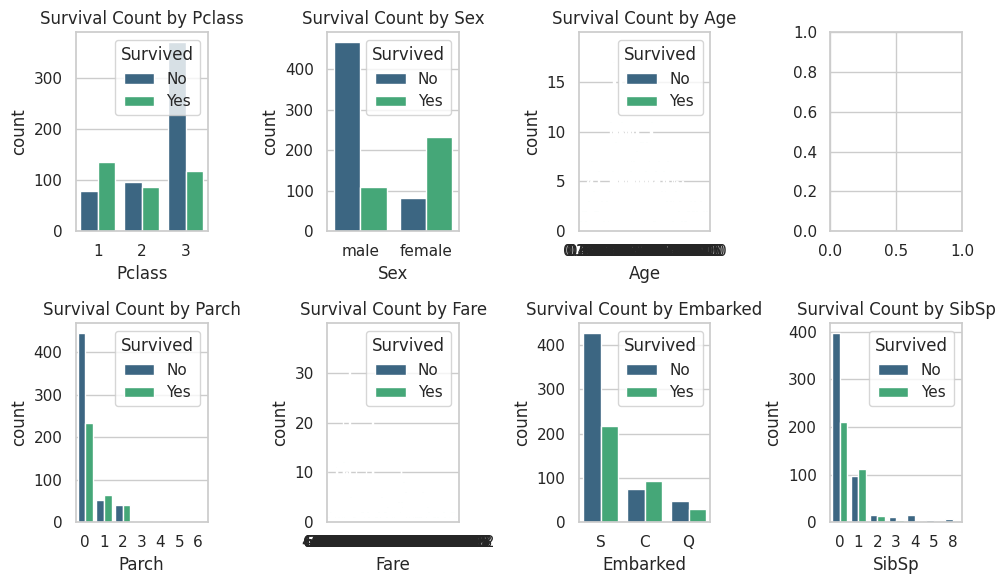

In [13]:
# These graphs are gold!
# Load and analyze the data
# Went for a tight layout does not look as good
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, column in enumerate(columns_to_plot):
  axes_actual = axes[0 if i<3 else 1][i%4]
  sns.countplot(x=column, hue='Survived', data=data, palette='viridis', ax=axes_actual)
  axes_actual.set_title(f'Survival Count by {column}')
  axes_actual.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [ ]:
# Based on the analysis of the data
# what should I expect for most likely for surviving and not surviving
# The columns we got are pClass, sex, age, sibsp, parch, ticket, fare, embarked
# Create fare bins
data['FareBin'] = pd.cut(data['Fare'], bins=[0, 10, 20, 30, 50, 100, 500])

# Compute survival counts per fare bin
fare_counts = data.pivot_table(index='FareBin', columns='Survived', aggfunc='size', fill_value=0)
# print(fare_counts)
# Calculate ratio of non-survivors to survivors
fare_counts['Ratio'] = fare_counts[0] / fare_counts[1]
# print('fare_counts\n',fare_counts)
# Find the fare bin with the highest ratio
highest_ratio_bin = fare_counts['Ratio'].idxmax()
highest_ratio_value = fare_counts.loc[highest_ratio_bin, 'Ratio']

print(highest_ratio_bin, highest_ratio_value)

(0, 10] 3.8636363636363638


In [ ]:
# This is me attempting to find a statistic that will make the data make sense
# This is the ratio. Deaths/survived of each column to see which column category had the highest
    # deaths out of the survival
# I am not sure this stat makes sense. It made sense when I looked at the graph. But
# now I am like what is this even computing?
# Shouldn't it be deaths/total for each column category.
# Example: Column -> 'Fare', Column Category -> (0,10), (10,20] in 'Fare's
def find_highest_ratio(data, column):
    if column=='Fare':
        # Create fare bins
        data['FareBin'] = pd.cut(data['Fare'], bins=[0, 10, 20, 30, 50, 100, 500])

        # Compute survival counts per fare bin
        fare_counts = data.pivot_table(index='FareBin', columns='Survived', aggfunc='size', fill_value=0)
#         print(fare_counts)
        # Calculate ratio of non-survivors to survivors
        fare_counts['Ratio'] = fare_counts[0] / fare_counts[1]
        # print('fare_counts\n',fare_counts)
        # Find the fare bin with the highest ratio
        highest_ratio_bin = fare_counts['Ratio'].idxmax()
        highest_ratio_value = fare_counts.loc[highest_ratio_bin, 'Ratio']
        print('Fare')
        print(highest_ratio_bin, highest_ratio_value)
    elif column=='Embarked':
        # Create bins
#         print('data[column]',data[column])
#         print('type(data[column])',type(data[column]))
#         print('typeof(data)',type(data))
        data['Bin'] = data[column]
        survival_counts = data.pivot_table(index='Bin', columns='Survived', aggfunc='size', fill_value=0)
        print('Embarked')
        print('survival_counts',survival_counts)

# Columns to plot, excluding 'PassengerId', 'Name', 'Ticket', 'Cabin' due to their specificity or lack of relevance
columns_to_plot = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Create a loop to generate plots for each relevant column
for column in columns_to_plot:
    find_highest_ratio(data, column)

Fare
(0, 10] 3.8636363636363638
Embarked
survival_counts Survived    0    1
Bin               
C          75   93
Q          47   30
S         427  217


In [20]:
data.head()
data.tail()
# Preview data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
# Load in test data
train_df = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')
test_df = pd.read_csv('./drive/MyDrive/Titanic_Challenge/test.csv')

In [23]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [24]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# Describe categorical data
# the include=['O'] means to include types that are objects
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [40]:
# P class vs Survived Mean Stat
# Mean stat is where we get the mean of the values for each category in PClass that survived
# This gives the mean of PClass that survived vs. ones that did not survive
# Survived = 0 means not survived, survived = 1 means survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [41]:
# Sex vs Survived Mean Stat
# total of survived(survived = 1) / total(survived=0 + survived=1)
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [42]:
# Embarked vs. Survived Mean Stat
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [51]:
# Parch vs. Survived Mean Stat
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [50]:
# Sibsp vs. Survived Mean Stat
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [68]:
# I wonder if the amount of SibSp or Parch is correlated with PClass
# train_df[['SibSp', 'Pclass']].value_counts()
train_df[['SibSp', 'Pclass']].groupby(['SibSp', 'Pclass'], as_index=False).value_counts()

,SibSp,Pclass,count
0,0,1,137
1,0,2,120
2,0,3,351
3,1,1,71
4,1,2,55
5,1,3,83
6,2,1,5
7,2,2,8
8,2,3,15
9,3,1,3


In [69]:
train_df[['Parch', 'Pclass']].groupby(['Parch', 'Pclass'], as_index=False).value_counts()

,Parch,Pclass,count
0,0,1,163
1,0,2,134
2,0,3,381
3,1,1,31
4,1,2,32
5,1,3,55
6,2,1,21
7,2,2,16
8,2,3,43
9,3,2,2


In [59]:
train_df[train_df['SibSp']== 5][['SibSp', 'Pclass']]

,SibSp,Pclass
59,5,3
71,5,3
386,5,3
480,5,3
683,5,3


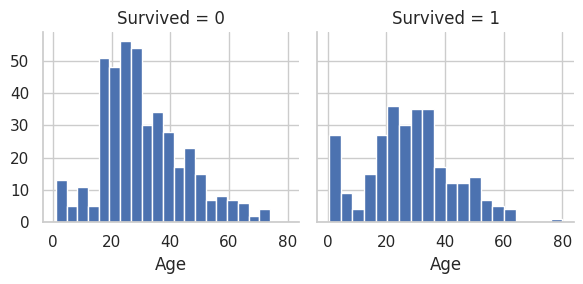

In [74]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
# Stopped at first analyze by visualizing data

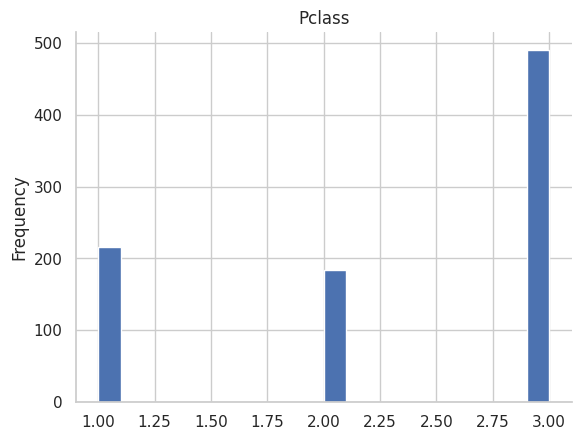

In [17]:
# @title Pclass

from matplotlib import pyplot as plt
data['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Age', ylabel='Count'>

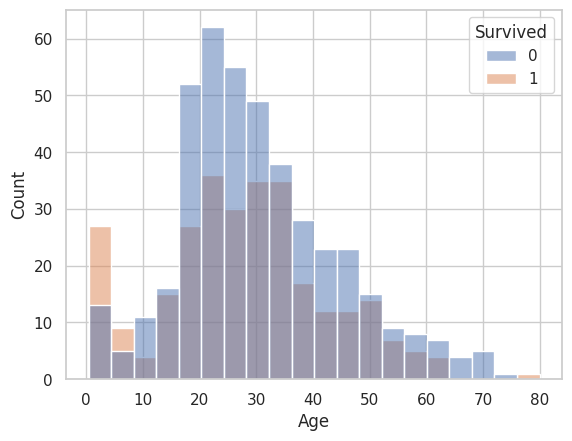

In [16]:
# @title Age distribution by survival

sns.histplot(x="Age", hue="Survived", data=data)